## RAO and Cone Nozzle Design
### Henry Hunt

In [20]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import time
import math

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

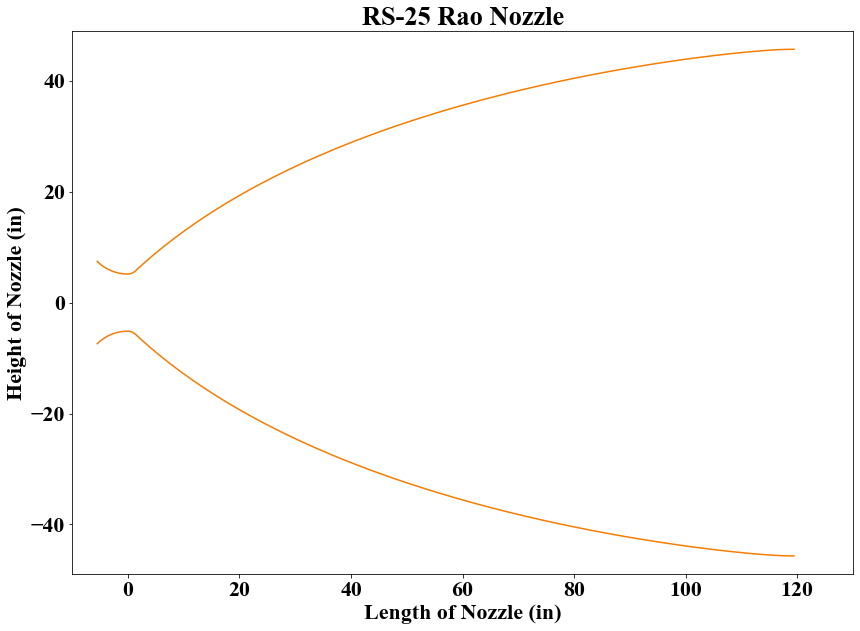

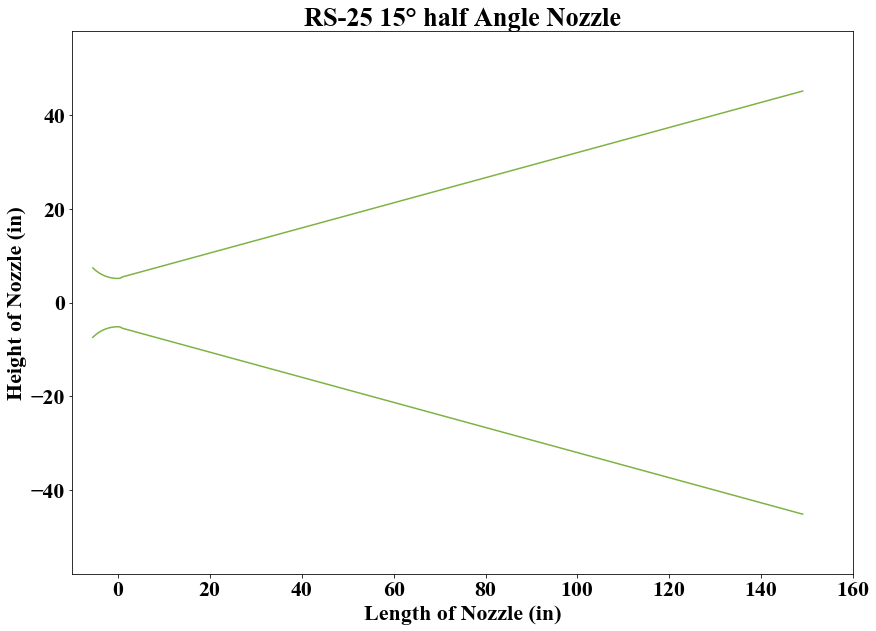

Plotted Data is populated


In [68]:
# Pre-setting Data Point Arrays for the Nozzles
X=[]   #X coord for Rao
Y=[]   #Y coord for Rao
X15=[] #X coord for 15⁰
Y15=[] #Y coord for 15⁰

#Space Shuttle Main Engine Information | Provided Inputs
Dt=10.3  #Throat Diameter | in
Rt=Dt/2  #Throat Radius | in
D2=90.7  #Exit Diameter | in
Re=D2/2  #Exit Radius |in
Ln=121   #Nozzle Length | in
ε=77.5   #Area Ratio | unitless
θN=40    #Nozzle Curve Angle Estimate | degrees
θE=8     #Exit Angle Estimate | degrees

#Converging Nozzle
for i in range (-135,-90,1):
    # Rao Nozzle Convergence
    X.append(1.5*Rt*math.cos(math.radians(i)))
    Y.append(1.5*Rt*math.sin(math.radians(i))+1.5*Rt+Rt)
    # Cone Nozzle Convergence
    X15.append(1.5*Rt*math.cos(math.radians(i)))
    Y15.append(1.5*Rt*math.sin(math.radians(i))+1.5*Rt+Rt)

#Throat and Circular Divergence
# Rao Nozzle
for i in range (-90,(θN-90),1):
    X.append(0.382*Rt*math.cos(math.radians(i)))
    Y.append(0.382*Rt*math.sin(math.radians(i))+0.382*Rt+Rt)
# Cone Nozzle
for i in range (-90,(15-90),1):    
    X15.append(0.382*Rt*math.cos(math.radians(i)))
    Y15.append(0.382*Rt*math.sin(math.radians(i))+0.382*Rt+Rt)

#Bell Divergence
Ex=Ln #Exit x-axis length | Length of Bell | in
Ey=Re #Exit y-axis height | Radius at Exit | in
Nx=0.382*Rt*math.cos(math.radians(θN-90))
Ny=0.382*Rt*math.sin(math.radians(θN-90))+0.382*Rt+Rt
m1=math.tan(math.radians(θN))
m2=math.tan(math.radians(θE))
C1=Ny-m1*Nx
C2=Ey-m2*Ex
Qx=(C2-C1)/(m1-m2)
Qy=(m1*C2-m2*C1)/(m1-m2)

for t in range (0,100,1):
    t=t/100
    X.append(((1-t)**0.5)*Nx+2*(1-t)*t*Qx+(t**2)*Ex)
    Y.append(((1-t)**0.5)*Ny+2*(1-t)*t*Qy+(t**2)*Ey)

#15º Half Angle Divergence
Nx15=0.382*Rt*math.cos(math.radians(15-90))
Ny15=0.382*Rt*math.sin(math.radians(15-90))+0.382*Rt+Rt
xtemp=int(round(Nx))
while math.tan(math.radians(15))*xtemp+Ny15 < Re: #Creating the conical shape
    X15.append(xtemp)
    Y15.append(math.tan(math.radians(15))*xtemp+Ny15)
    xtemp=xtemp+1
    
#Plotting the Bell Nozzle 
NegY=[i*-1 for i in Y] #Creating the other side
col= '#f57c00'
plt.plot(X,Y,color=col)
plt.plot(X,NegY,color=col)
plt.xlim([-10,130])
plt.ylim([-49,49])
plt.title('RS-25 Rao Nozzle')
plt.xlabel('Length of Nozzle (in)')
plt.ylabel('Height of Nozzle (in)')
plt.show()

# Plotting 15 degree Half Angle Nozzle
NegY15=[i*-1 for i in Y15] #Creating the other side
col='#7cb342'
plt.plot(X15,Y15,color=col)
plt.plot(X15,NegY15,color=col)
plt.xlim([-10,160])
plt.ylim([-58,58])
plt.title('RS-25 15° half Angle Nozzle')
plt.xlabel('Length of Nozzle (in)')
plt.ylabel('Height of Nozzle (in)')
plt.show()

def writetofile():
    import os
    outputname='Plotted Data'
    #X-coordinates
    a=X
    #Y-Coordinates
    b=Y
    #X15-Coordinates
    c=X15
    #Y15-Coordinates
    d=Y15
    
    #Opens the average.txt file and writes the passed data onto the txt file
    myfile=open(outputname,'w')
    myfile.write('X values are: '+str(a)+'\n')
    myfile.write('Y values are: '+str(b)+'\n')
    myfile.write('X15 values are: '+str(c)+'\n')
    myfile.write('Y15 values are: '+str(d)+'\n')
    
    myfile.close()
    
    if os.stat(outputname).st_size > 0:
        print("Plotted Data is populated")
    else:
        print("The output file is empty, need to check")
        
writetofile()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


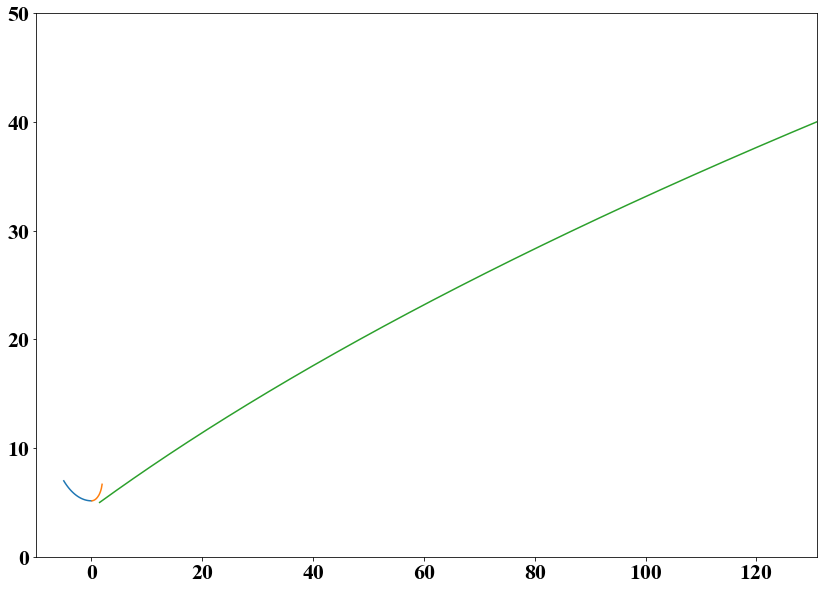

In [65]:
#Alternative Attempt for Solution using Linear Algebra | Didn't work
#Space Shuttle Main Engine Information | Provided Inputs
Dt=10.3  #Throat Diameter | in
Rt=Dt/2  #Throat Radius | in
D2=90.7  #Exit Diameter | in
Re=D2/2  #Exit Radius |in
Ln=121   #Nozzle Length | in
ε=77.5   #Area Radio | unitless

#Cord System
    # X is the axial axis passing through the line of symmetry
    # Y is the radial axis through the center of the throat

#Length of Nozzle
    #This is provided
nozX=np.linspace(0.1,Ln,1000)

#Initial Circle from Combusition Chamber to Throat | Curve 1
# x**2+(y-(Rt_1.5*Rt))**2=(1.5*Rt)**2 #Solve for y | Bottom half of circle ∴ negative
nozX=np.linspace(-5,0,100)
nozY=-np.sqrt((1.5*Rt)**2-(nozX)**2)+2.5*Rt
plt.plot(nozX,nozY)

#Small Circle Exiting the Throat | Curve 2
nozX=np.linspace(0.1,Ln,1000)
nozY=-np.sqrt((0.382*Rt)**2-nozX**2)+1.382*Rt
plt.plot(nozX,nozY)

#Parabola to Extend the Bell Contour to the Exit Plane | Curve 3
# x=a*y**2+b*y+c
θN=35                            #Nozzle Angle | degrees
XN=0.382*Rt*np.sin(np.deg2rad(θN))

#Solving for the curvature
RN=-np.sqrt((0.382*Rt)**2-XN**2)+1.382*Rt
RE=Re
PAIN=np.array([[2*RN,1,0],[2*RE,1,0],[RN**2,RN,1]])
c=np.array([(1/np.tan(θN)),(1/np.tan(θE)),XN])
curveset=np.linalg.solve(PAIN,c)

#Plotting the Final Curvature
sety=np.linspace(5,60,1000)
setx=-curveset[0]*sety**2+curveset[1]*sety+curveset[2]
plt.plot(setx,sety)
plt.xlim(-10,Ln+10)
plt.ylim(0,50)
plt.show()          #Printing the plot
